# HOUSE PRICE PREDICTION 

In [2102]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2103]:
#IMPORTING THE DATASET
df=pd.read_csv(r"C:\Users\91879\Downloads\Housing (1).csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# EXPLORATORY DATA ANALYSIS

In [2104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [2105]:
df["bedrooms"].value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

In [2106]:
df["bathrooms"].value_counts(normalize=True).mul(100)

1    73.577982
2    24.403670
3     1.834862
4     0.183486
Name: bathrooms, dtype: float64

In [2107]:
df["stories"].value_counts(normalize=True).mul(100)

2    43.669725
1    41.651376
4     7.522936
3     7.155963
Name: stories, dtype: float64

In [2108]:
df["mainroad"].value_counts(normalize=True).mul(100)

yes    85.87156
no     14.12844
Name: mainroad, dtype: float64

In [2109]:
df["guestroom"].value_counts(normalize=True).mul(100)

no     82.201835
yes    17.798165
Name: guestroom, dtype: float64

In [2110]:
df["basement"].value_counts(normalize=True).mul(100)

no     64.954128
yes    35.045872
Name: basement, dtype: float64

In [2111]:
df["hotwaterheating"].value_counts(normalize=True).mul(100)

C:\Users\91879\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


no     95.412844
yes     4.587156
Name: hotwaterheating, dtype: float64

In [2112]:
df["airconditioning"].value_counts(normalize=True).mul(100)

no     68.440367
yes    31.559633
Name: airconditioning, dtype: float64

In [2113]:
df["parking"].value_counts(normalize=True).mul(100)

0    54.862385
1    23.119266
2    19.816514
3     2.201835
Name: parking, dtype: float64

In [2114]:
df["prefarea"].value_counts(normalize=True).mul(100)

no     76.513761
yes    23.486239
Name: prefarea, dtype: float64

In [2115]:
df["furnishingstatus"].value_counts(normalize=True).mul(100)

semi-furnished    41.651376
unfurnished       32.660550
furnished         25.688073
Name: furnishingstatus, dtype: float64

In [2116]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

There is no null values

Here we can see few columns are in object datatype

## Data Visualisation

In [2117]:
cols=[ 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']

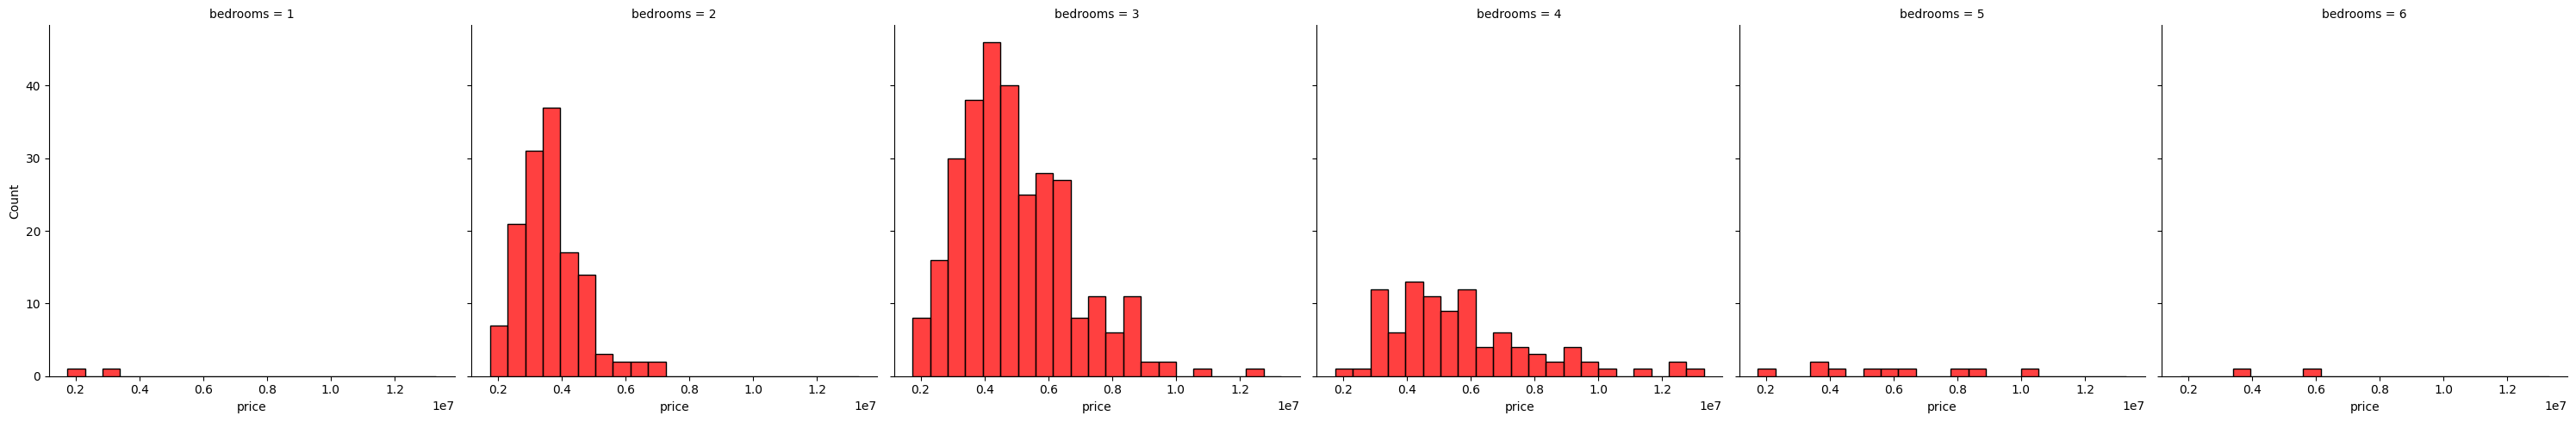

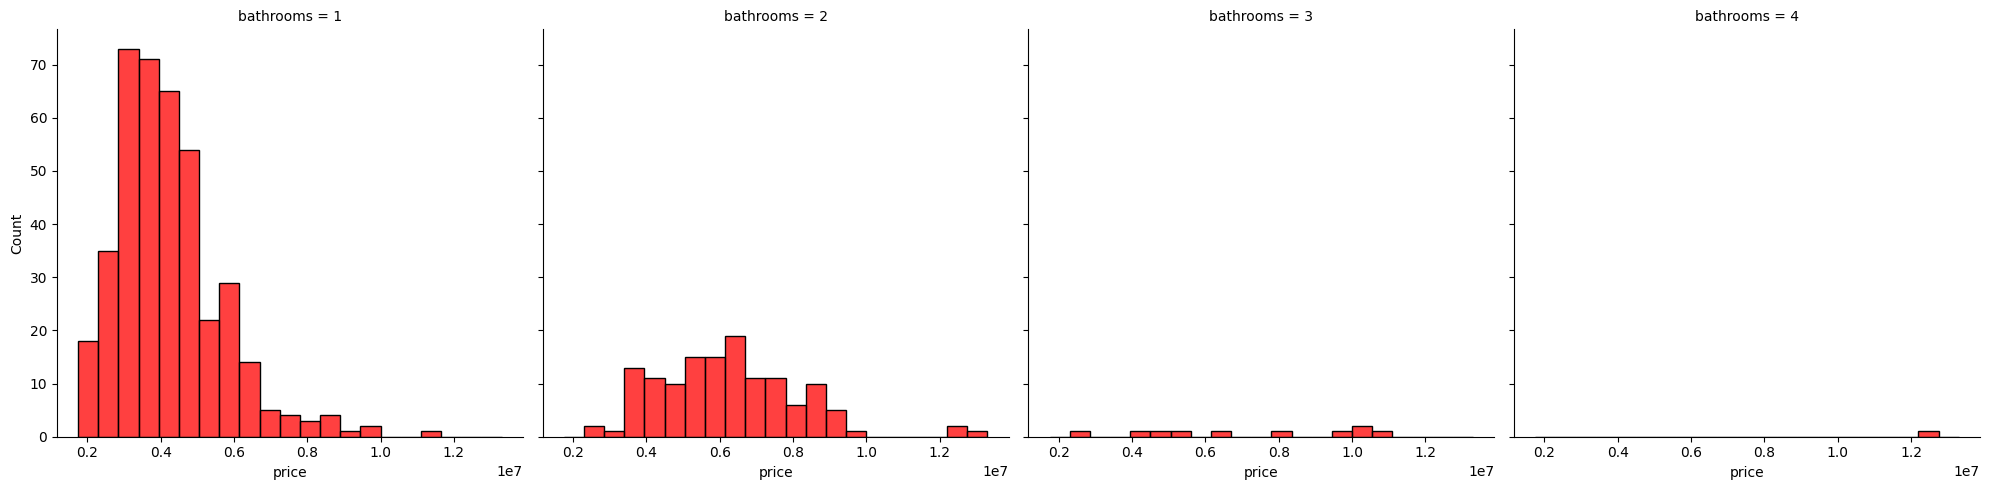

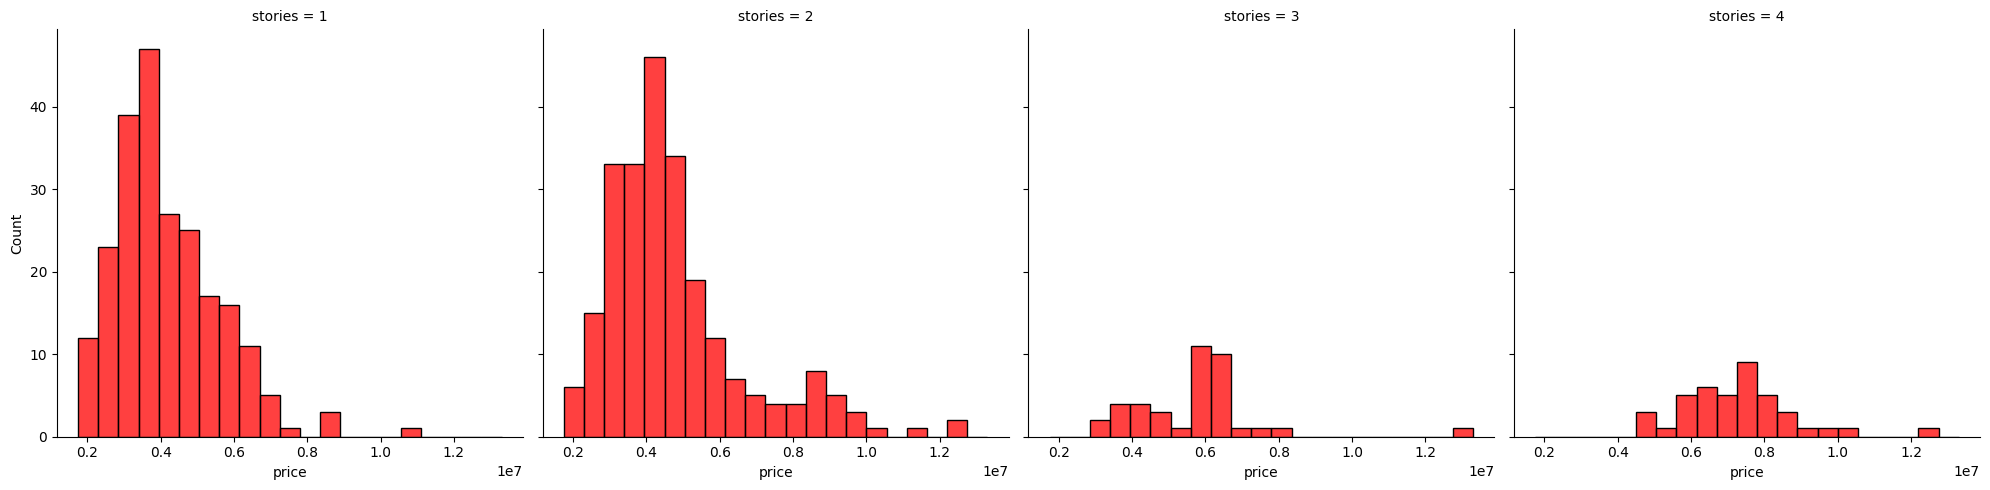

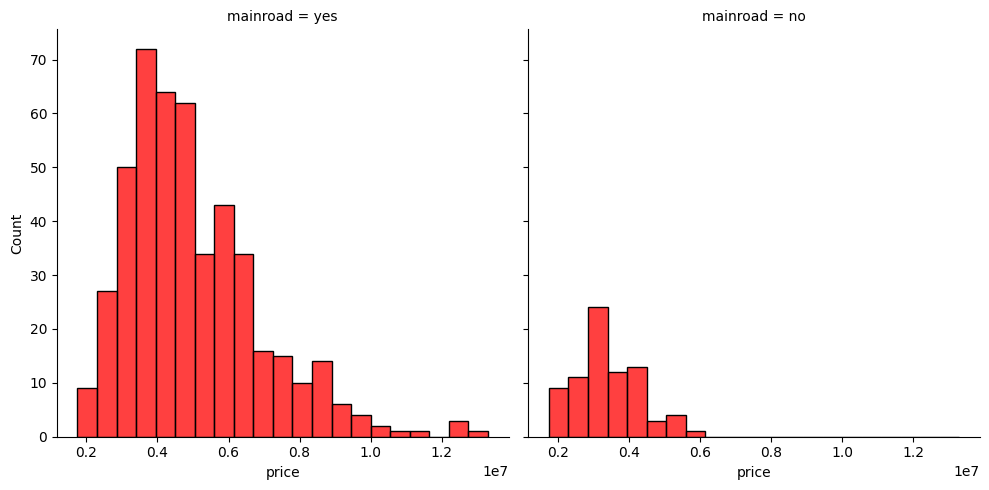

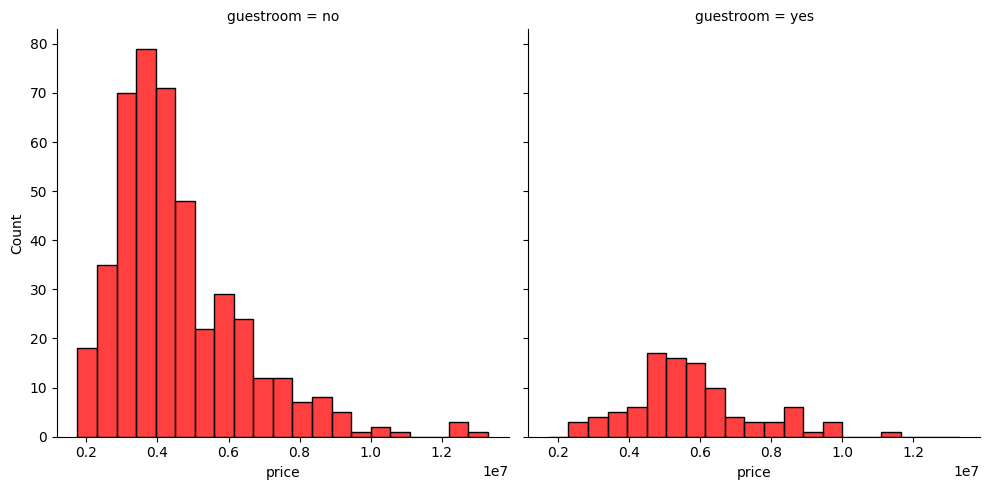

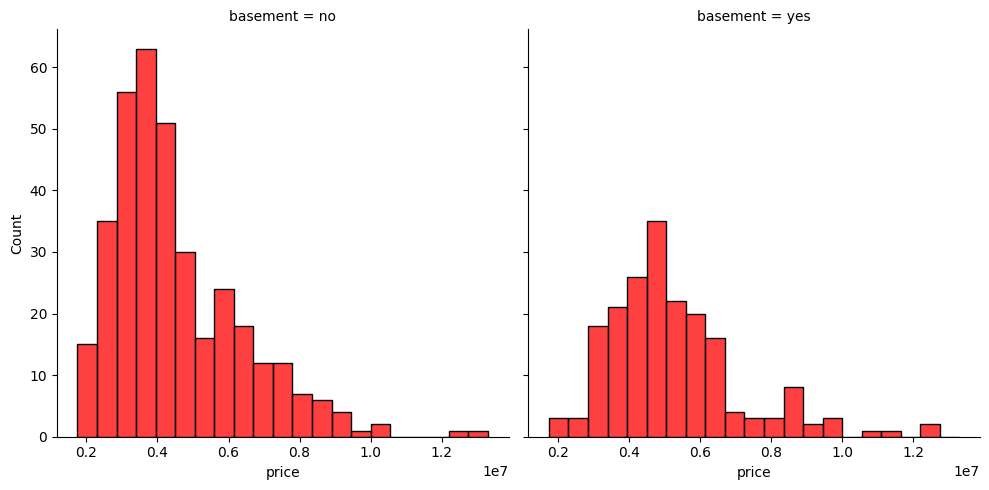

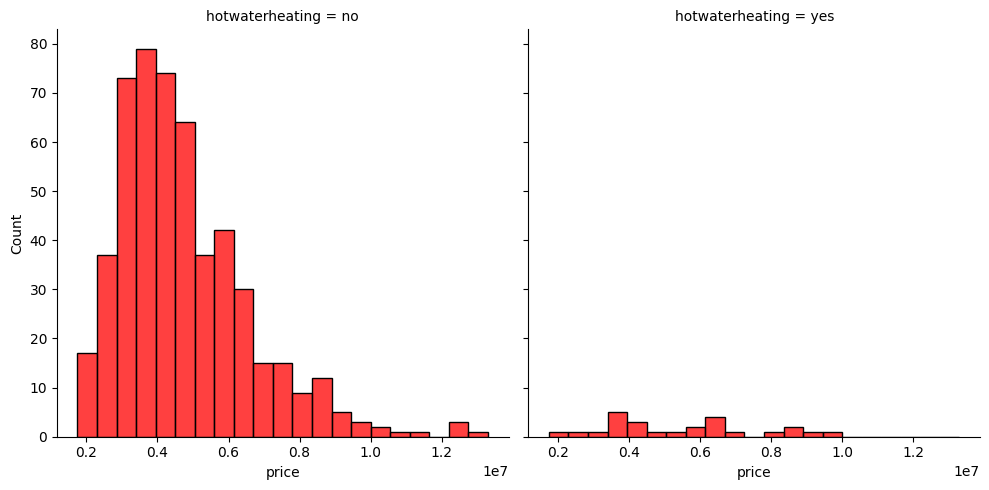

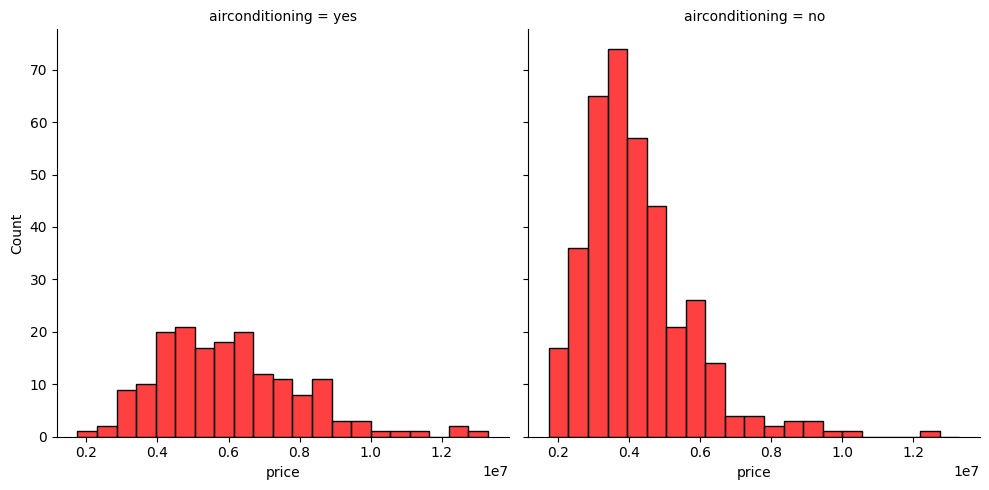

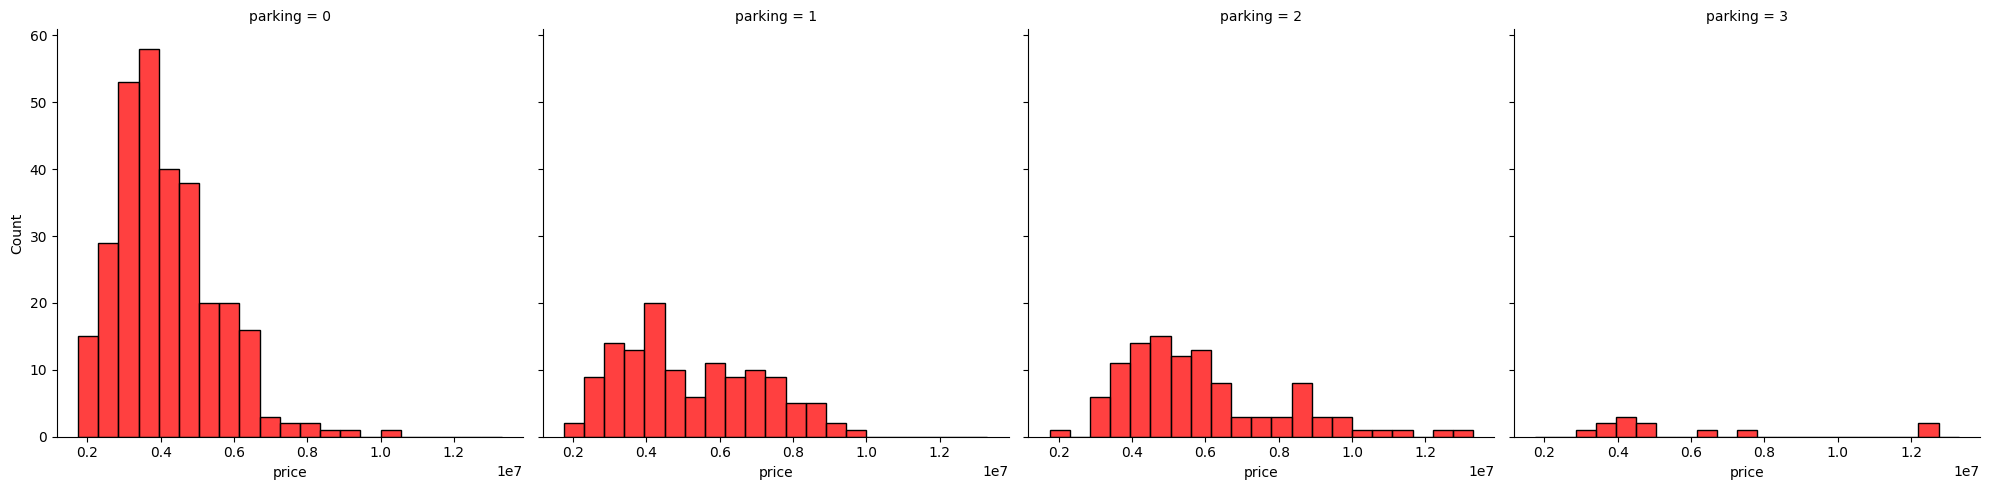

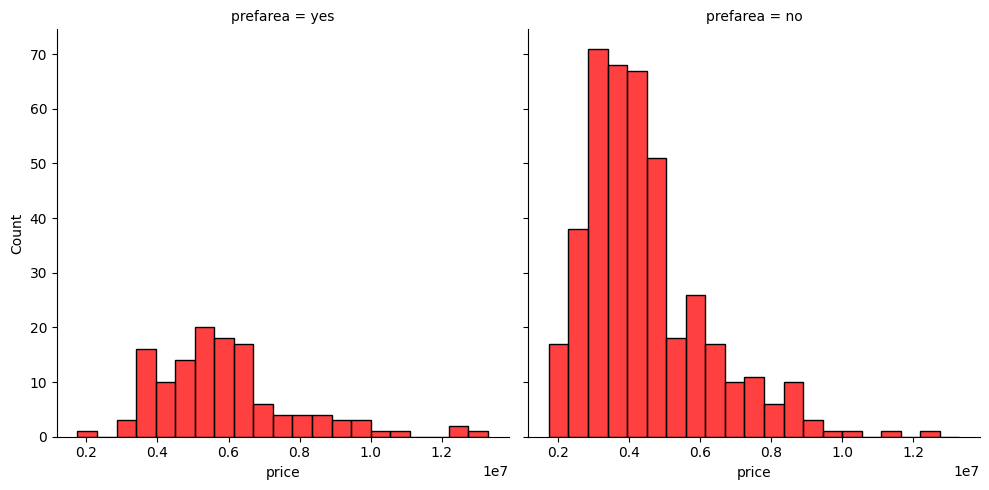

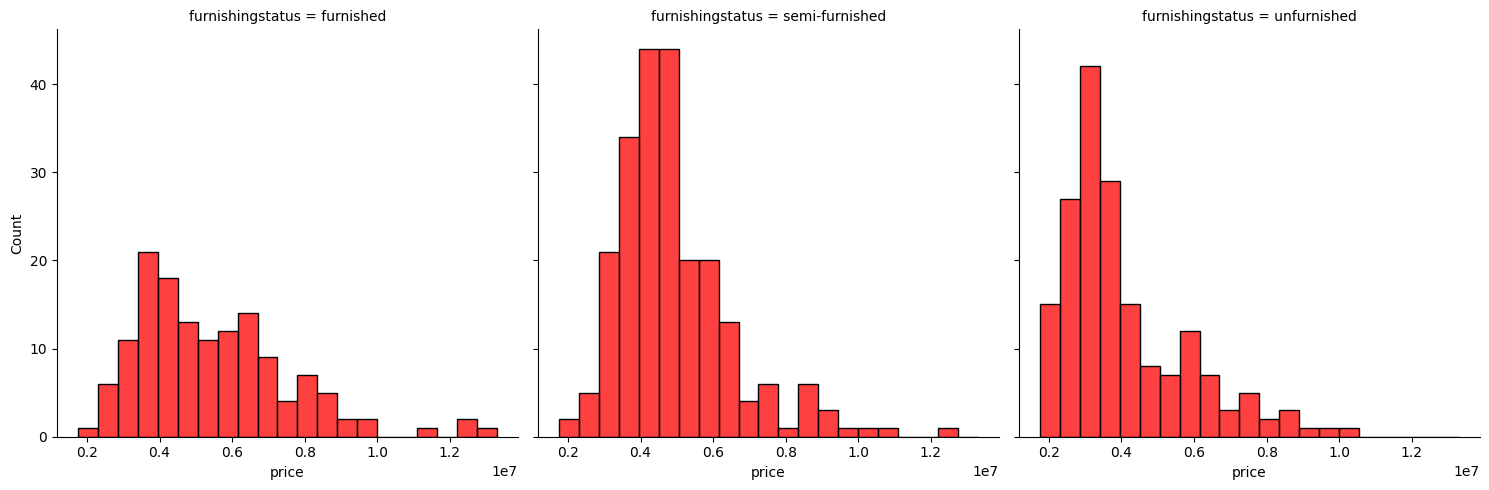

In [2118]:
for i in cols:
    sns.displot(df,x="price",col=i,color="red")

In [2119]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [2120]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [2121]:
for i in object_columns:
    df[i]=encoder.fit_transform(df[i])

To encode object datatype columns 

In [2122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int32
 6   guestroom         545 non-null    int32
 7   basement          545 non-null    int32
 8   hotwaterheating   545 non-null    int32
 9   airconditioning   545 non-null    int32
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int32
 12  furnishingstatus  545 non-null    int32
dtypes: int32(7), int64(6)
memory usage: 40.6 KB


Now we can there is no object dtype column

In [2123]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [2124]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


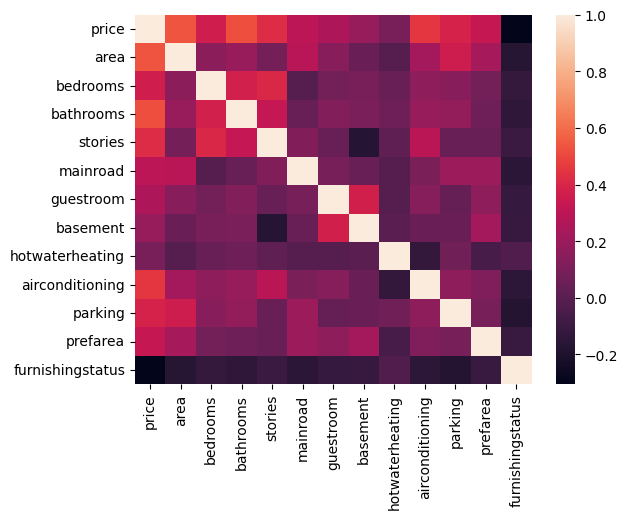

In [2125]:
sns.heatmap(df.corr())
plt.show()

Here we can see that there is no significant correlation between independent attributes

# Feature Selection

In [2126]:
cat_columns=[ 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']

In [2127]:
import scipy.stats as stat

In [2128]:
s=[]
for attr in cat_columns:
    cat_list=df.groupby(attr)["price"].apply(list)
    result=stat.f_oneway(*cat_list)
    s.append([attr,result[-1]])
s_=pd.DataFrame(s)
s_=s_.rename(columns={0:"Attribute",1:"P-Value"})
s_

,Attribute,P-Value
0,bedrooms,5.359906e-18
1,bathrooms,2.272370e-37
2,stories,2.683246e-24
3,mainroad,1.490104e-12
4,guestroom,1.429114e-09
5,basement,1.104105e-05
6,hotwaterheating,2.981524e-02
7,airconditioning,6.310970e-29
8,parking,1.455351e-19
9,prefarea,2.718374e-15


In [2129]:
feature_selected=['area','bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']

# Model Fitting

In [2130]:
x=df.drop(["price"],axis=1)
y=df["price"]

In [2131]:
from sklearn.model_selection import train_test_split

In [2132]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=7)

In [2133]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [2134]:
model=lr.fit(X_train,y_train)

In [2135]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [2136]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
test=het_goldfeldquandt(y,x)
print("Pvalue= ",test[1])

Pvalue=  0.9999999999999999


In [2137]:
from statsmodels.stats.stattools import durbin_watson
autocorrelation_test=durbin_watson(y_train-y_train_pred)
autocorrelation_test

1.9593292946651308

In [2138]:
from sklearn.metrics import r2_score 

In [2139]:
adj_r2=r2_score(y_train,y_train_pred)
accuracy=r2_score(y_test,y_test_pred)


In [2140]:
adj_r2

0.6770867920098129

In [2141]:
accuracy

0.6769004892376298

In [2142]:
data=pd.DataFrame(y_test)

In [2143]:
data["predicted price"]=(y_test_pred)

In [2144]:
data=data.reset_index()

In [2145]:
data.drop('index',axis=1)

,price,predicted price
0,1750000,2.664487e+06
1,6790000,6.324244e+06
2,2653000,3.402524e+06
3,4767000,4.425441e+06
4,2450000,3.426607e+06
...,...,...
104,3703000,4.069119e+06
105,4550000,5.129936e+06
106,3150000,2.761930e+06
107,2604000,2.013216e+06
